<a href="https://colab.research.google.com/github/Seeethy/Evolutionary-Algorithm-for-N-queens-problem/blob/main/Evolutionary_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comments and names of variables are written in polish. The code below is an implementation of an evolutionary algorithm for N - queens problem. 

In [ ]:
n = 50      # rozmiar szachownicy i liczba hetmanów
pop = 10      # liczba osobników w populacji: np. 10 lub 100
genmax = 1000 # maksymalna liczba generacji np. 1000 lub 10000
pc = 0.2      # dyskryminator krzyżowania np. 0.7 lub 0.9
pm = 0.2      # dyskryminator mutacji np. 0.2 lub 0.5

In [ ]:
import numpy as np
plansza = np.zeros(shape=(n,n))
wiersz = 0
wspolrzedne_hetmanow = []

def stawianie_hetmana(kolumna):
  global wiersz
  wspolrzedne_hetmanow.append([wiersz,kolumna]) #dodaje wspolrzedne pojedynczego hetmana
  plansza[wiersz,kolumna] = 1 # 1 - hetman, 0 - brak hetmana
  wiersz+=1

def wyzerowanie_planszy():
  global wiersz,wspolrzedne_hetmanow,plansza
  wiersz = 0
  wspolrzedne_hetmanow = []
  plansza = np.zeros(shape=(n,n))


In [ ]:
def evaluate(P): # sprawdza ILOŚĆ ataków na planszy
  wyzerowanie_planszy()
  wystepowanie_ataku = 0 # licznik wystapien ataków na planszy
  for i in P: # stawiamy hetmana z osobnika na plansze
    stawianie_hetmana(i)
  for wspolrzednia in wspolrzedne_hetmanow:
    aktualny_wiersz = wspolrzednia[0] #wyciaganie wiersza ze wspolrzednej
    aktualna_kolumna = wspolrzednia[1] #wyciaganie kolumny ze wspolrzednej
    for w in range(n):
      if plansza[aktualny_wiersz][w] == 1 and w != aktualna_kolumna:
        wystepowanie_ataku += 1 # wystapil atak w wierszu w ktorym jest hetman-> zwiekszam licznik
    for k in range(n):
      if plansza[k][aktualna_kolumna] == 1 and k != aktualny_wiersz:
        wystepowanie_ataku += 1 # wystapil atak w kolumnie w ktorej jest hetman -> zwiekszam licznik

    # przekatna z lewego gornego w prawy dolny
    ileMoznaCofnac = min(aktualny_wiersz,aktualna_kolumna)
    wierszPoczatkowy = aktualny_wiersz - ileMoznaCofnac
    kolumnaPoczatkowa = aktualna_kolumna - ileMoznaCofnac
    while wierszPoczatkowy < n and kolumnaPoczatkowa < n: 
      if wierszPoczatkowy == aktualny_wiersz:
        wierszPoczatkowy += 1
        kolumnaPoczatkowa += 1
        continue
      if plansza[wierszPoczatkowy][kolumnaPoczatkowa] == 1: 
        wystepowanie_ataku += 1
      wierszPoczatkowy += 1
      kolumnaPoczatkowa += 1

    # przekatna z prawego dolnego w lewy gorny
    ileMoznaCofnac = min(n - aktualny_wiersz - 1,aktualna_kolumna)
    wierszPoczatkowy = aktualny_wiersz + ileMoznaCofnac
    kolumnaPoczatkowa = aktualna_kolumna - ileMoznaCofnac
    while wierszPoczatkowy >= 0  and kolumnaPoczatkowa < n: 
      if wierszPoczatkowy == aktualny_wiersz:
        wierszPoczatkowy -= 1
        kolumnaPoczatkowa += 1
        continue
      if plansza[wierszPoczatkowy][kolumnaPoczatkowa] == 1: 
        wystepowanie_ataku += 1
      wierszPoczatkowy -= 1
      kolumnaPoczatkowa += 1  

  return wystepowanie_ataku

print(evaluate([0,1,2,3,4]))
print(plansza) 


20
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import random
  
def generacja_populacjii(): #tworzy losowy kod dla danego osobnika.
  osobnik = [] # kod aktualnego osobnika
  populacja = [] # przechowuje osobnikow
  for i in range(0,n,1):
    osobnik.append(i)
  for losowanie in range(pop):
    random.shuffle(osobnik)
    populacja.append(osobnik[:])
  return populacja

generuje = generacja_populacjii()


In [ ]:
def selection(P): # losuje dwóch osobników i wybiera lepszego z nich do nowej populacji
  i = 0
  Pn = [] #nowa populacja
  while i < pop:
    i1 = random.randrange(pop) # 1 osobnik
    i2 = random.randrange(pop) # 2 osobnik
    if i1 != i2:
      if evaluate(P[i1]) <= evaluate(P[i2]):
        Pn.append(P[i1])
      else:
        Pn.append(P[i2])
      i+=1
  return Pn

pn = selection(generuje)


In [ ]:

def mutate(Pi): #zamiana miejscami 2 elementow w kodzie osobnika
  ind1 = random.randrange(len(Pi))
  ind2 = random.randrange(len(Pi))  
  tempind1 = Pi[ind1]
  Pi[ind1] = Pi[ind2]
  Pi[ind2] = tempind1
  return Pi

     
def mutation(pn): # dla wszystkich populacji wywoluje mutate pod warunkiem ze losowa zmienna jest mniejsza od zmiennej pm
  i = 0
  templist = []
  while i < pop:
    losowe = random.uniform(0,1)
    if losowe < pm:
      templist.append(mutate(pn[i])[:]) 
    else:
      templist.append(pn[i][:])
    i+=1
  return templist


mutation(pn)



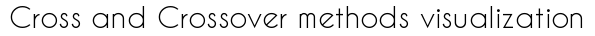


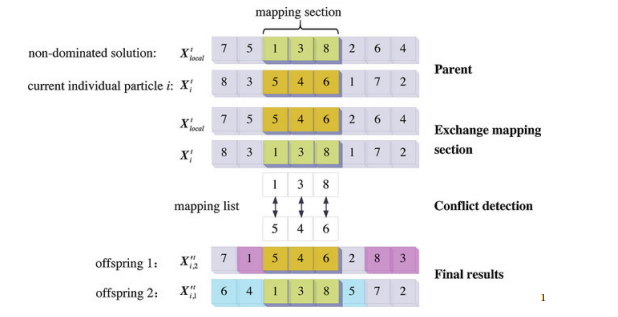

In [ ]:

def cross(x1,x2): # krzyzuje dwóch osobników 
  poczatek_przedzialu = random.randrange(0,n) #początek przedziału od 0 do n. Np poczatek = 2
  koniec_przedzialu = random.randrange(poczatek_przedzialu,n) # koniec od poczatku do n. np koniec = 5
  # przedzial od 2 do 5 dla powyzszego przykladu

  mapping_x1 = x1[poczatek_przedzialu:koniec_przedzialu+1]  #wydzielenie przedziałów do zamiany
  mapping_x2 = x2[poczatek_przedzialu:koniec_przedzialu+1]  

  x1[poczatek_przedzialu:koniec_przedzialu+1] = mapping_x2   # zamiana elementow znajdujacych sie w wylosowanym przedziale dla zmiennej x1
  x2[poczatek_przedzialu:koniec_przedzialu+1] = mapping_x1   # zamiana elementow znajdujacych sie w wylosowanym przedziale dla zmiennej x2

  for i in range(len(x1)): # conflict detection z pdfa
    if i>= poczatek_przedzialu and i <= koniec_przedzialu: # jesli nalezy do przedzialu
     continue 
    else: # jesli jest poza przedzialem
      if x1[i] in mapping_x2: 
        indeks = 0
        for j in range(len(mapping_x2)): # szukamy czy musimy zamienic daną liczbe
          if x1[i] == mapping_x2[j]:
            indeks = j
            break
        x1[i] = mapping_x1[indeks]

  for i in range(len(x2)): 
    if i>= poczatek_przedzialu and i <= koniec_przedzialu:
     continue
    else:
      if x2[i] in mapping_x1:
        indeks = 0
        for j in range(len(mapping_x1)):
          if x2[i] == mapping_x1[j]:
            indeks = j
            break
        x2[i] = mapping_x2[indeks]
  return x1,x2 


def crossover(pn): 
  i = 0
  templist = []
  while i < pop - 1: # indeksowanie od 0 dlatego pop -1 zamist pop -2
    losowe = random.uniform(0,1)
    if losowe < pc:
      wywolanie_crossa = cross(pn[i],pn[i+1])
      templist.append(wywolanie_crossa[0]) 
      templist.append(wywolanie_crossa[1]) 
    else:
       templist.append(pn[i])
       templist.append(pn[i+1])
    i+=2
  return templist



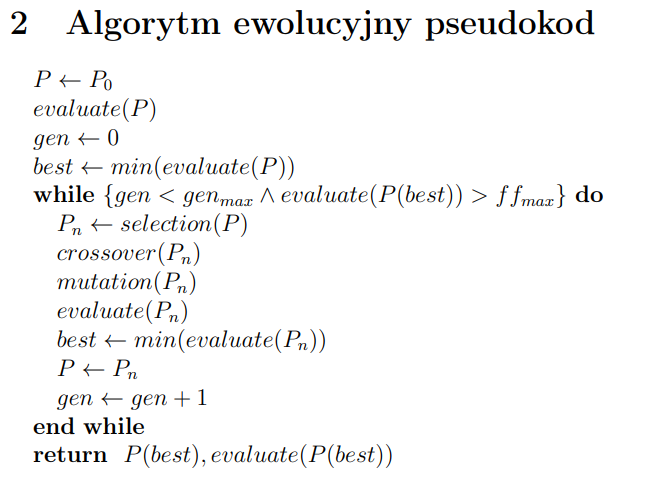

In [ ]:
def evaluate_populacja(P): # dla calej populacji wywolujemy evaluate (ile atakow dla kazdego osobnika w populacji)
  lista_wyników = []
  for i in range(len(P)):
    lista_wyników.append(evaluate(P[i]))
  return lista_wyników


def algorytm_ewolucyjny():
  P = generacja_populacjii()
  ffmax = 0
  oś_y = []
  oś_x = []
  oś_y_średnie = []
  y = evaluate_populacja(P)
  y_średnie = sum(y) / len(y) 
  Ymin = min(y) # Ymin = best im mniej atakow tym lepiej
  gen = 0
  oś_y.append(Ymin)
  oś_x.append(gen)
  oś_y_średnie.append(y_średnie)
  while  gen < genmax and Ymin > ffmax:
    pn = selection(P)
    pn = crossover(pn)
    pn = mutation(pn)
    y = evaluate_populacja(pn)
    y_średnie = sum(y) / len(y)
    Ymin = min(y)
    P = pn
    gen +=1
    oś_y.append(Ymin)
    oś_x.append(gen)
    oś_y_średnie.append(y_średnie)
  #print(y)
  #print(P)
  return oś_x, oś_y, oś_y_średnie

oś_x_wykres,oś_y_wykres,oś_y_średnie = algorytm_ewolucyjny()
print(oś_x_wykres,"\n")
print(oś_y_wykres,"\n")



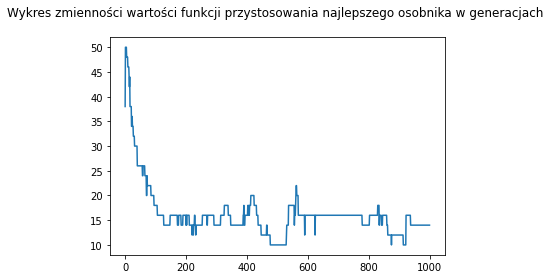

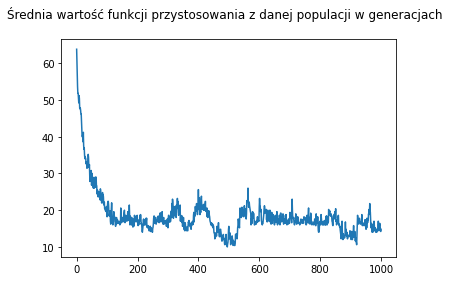

In [ ]:
import matplotlib.pyplot as plt
#pierwszy wykres
plt.plot(oś_x_wykres, oś_y_wykres)
plt.title('Wykres zmienności wartości funkcji przystosowania najlepszego osobnika w generacjach \n')
plt.show()

#drugi wykres
plt.plot(oś_x_wykres, oś_y_średnie)
plt.title('Średnia wartość funkcji przystosowania z danej populacji w generacjach  \n')
plt.show()

